# Neural network regression

In this many-to-one regression setup, we stack the series from all inverters into a long vector and try to predict the aggregate power a few steps ahead.

In [1]:
import pandas as pd
from core.preprocessing import make_small_train, make_small_dev
from core.neural_net_forecaster import NeuralNetForecaster

df = pd.read_pickle('data/master_dataset.pkl').fillna(0)

dftrain = make_small_train(df, 'combined')
dfdev = make_small_dev(df)

problem = NeuralNetForecaster(dftrain, dfdev)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


## Training

In [2]:
problem.make_forecasts()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               432100    
_________________________________________________________________
dense_2 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_3 (Dense)              (None, 36)                2916      
Total params: 443,096
Trainable params: 443,096
Non-trainable params: 0
_________________________________________________________________
None
Iteration 0
Train on 7776 samples, validate on 864 samples
Epoch 1/1
7776/7776 [==============================] - 3s 339us/step - loss: 2499.4006 - mean_squared_error: 2493.3769 - val_loss: 1337.9397 - val_mean_squared_error: 1332.4997
Iteration 1
Train on 7776 samples, validate on 864 samples
Epoch 1/1
7776/7776 [==============================] - 3s 323us/step - loss: 1209.4559 - mean_square

Train on 7776 samples, validate on 864 samples
Epoch 1/1
7776/7776 [==============================] - 2s 295us/step - loss: 368.7418 - mean_squared_error: 355.1429 - val_loss: 338.7691 - val_mean_squared_error: 325.2471
Iteration 33
Train on 7776 samples, validate on 864 samples
Epoch 1/1
7776/7776 [==============================] - 2s 301us/step - loss: 321.7279 - mean_squared_error: 308.2166 - val_loss: 420.2305 - val_mean_squared_error: 406.7836
Iteration 34
Train on 7776 samples, validate on 864 samples
Epoch 1/1
7776/7776 [==============================] - 2s 298us/step - loss: 368.8780 - mean_squared_error: 355.4117 - val_loss: 352.1322 - val_mean_squared_error: 338.7432
Iteration 35
Train on 7776 samples, validate on 864 samples
Epoch 1/1
7776/7776 [==============================] - 2s 304us/step - loss: 374.0502 - mean_squared_error: 360.6879 - val_loss: 347.0820 - val_mean_squared_error: 333.7719
Iteration 36
Train on 7776 samples, validate on 864 samples
Epoch 1/1
7776/7776 [

7776/7776 [==============================] - 2s 318us/step - loss: 297.3673 - mean_squared_error: 285.1263 - val_loss: 308.7629 - val_mean_squared_error: 296.5397
Iteration 68
Train on 7776 samples, validate on 864 samples
Epoch 1/1
7776/7776 [==============================] - 2s 319us/step - loss: 316.1147 - mean_squared_error: 303.8536 - val_loss: 291.1773 - val_mean_squared_error: 278.8899
Iteration 69
Train on 7776 samples, validate on 864 samples
Epoch 1/1
7776/7776 [==============================] - 3s 322us/step - loss: 302.5356 - mean_squared_error: 290.2878 - val_loss: 278.3850 - val_mean_squared_error: 266.2271
Iteration 70
Train on 7776 samples, validate on 864 samples
Epoch 1/1
7776/7776 [==============================] - 2s 316us/step - loss: 288.7806 - mean_squared_error: 276.6537 - val_loss: 280.6922 - val_mean_squared_error: 268.5896
Iteration 71
Train on 7776 samples, validate on 864 samples
Epoch 1/1
7776/7776 [==============================] - 2s 316us/step - loss: 2

## Prediction

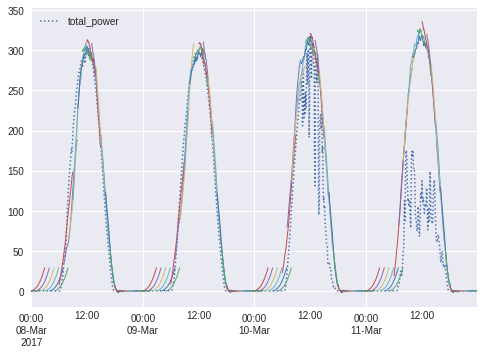

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

problem.plot_test()

ax = plt.gca()
lim = ax.get_xlim()

chunk = (lim[1] - lim[0])/8.
start = lim[0] + 2*chunk
end = lim[0] + 6*chunk

ax.set_xlim(start, end)

plt.show()

In [4]:
problem.calc_mse()

6433.5695576278331